### Bundesliga Team Data

The Bundesliga is a German Professional Football/Soccer league. Enter a team in the script and generate three graphs showing:

* Total Goals For/Against
* Total Home/Away Goals
* Goals For/Against Ratio

In [21]:
import os
import pandas as pd

teams_df = pd.read_csv(os.path.normpath(f'{os.getcwd()}/Data/bundesliga_teams.csv')) #index_col='Team')
teams_df

,ID,Team
0,1,TSV 1860
1,2,Münster
2,3,Saarbrücken
3,4,Karlsruhe
4,5,Frankfurt
5,6,Schalke
6,7,Hertha
7,8,Bremen
8,9,Braunschweig
9,10,HSV


#### Select a Bundesliga Team (By Number) Below

In [25]:
number = input('Enter Team Number: ')
team_id = teams_df['Team'][teams_df['ID'] == int(number)]
team = team_id.squeeze()
team_id = int(number)

team

Enter Team Number: 16


'Dortmund'

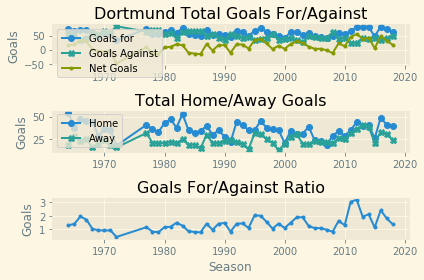

In [26]:
from matplotlib import pyplot as plt

data = pd.read_csv(os.path.normpath(f'{os.getcwd()}/Data/bundesliga_results.csv'))

season = data['SeasonTo'][(data['HomeID'] == team_id) | (data['GuestID'] == team_id)]
# Team Home Goals
home_goals = pd.Series(data['Score90Home'][data['HomeID'] == team_id], name=f'{team} Home Goals')
# Team Away Goals
away_goals = pd.Series(data['Score90Guest'][data['GuestID'] == team_id], name=f'{team} Away Goals')
# Goals scored by opponents when facing the 'team' at Home
opp_away_goals = pd.Series(data['Score90Guest'][data['HomeID'] == team_id], name='Opp Away Goals')
# Goals scored by opponents when facing the 'team' while away
opp_home_goals = pd.Series(data['Score90Home'][data['GuestID'] == team_id], name='Opp Home Goals')
total = pd.DataFrame([season, home_goals, opp_away_goals, away_goals, opp_home_goals]).transpose()
total.fillna(0, inplace=True)

# Total goals for/against given 'team'
total['Total for'] = total[f'{team} Home Goals'] + total[f'{team} Away Goals']
total['Total against'] = total['Opp Home Goals'] + total['Opp Away Goals']
# Order rows by season
total.set_index('SeasonTo', inplace=True)
goals_by_season = total.groupby('SeasonTo')
average_goals = goals_by_season.mean()
total_goals = goals_by_season.sum()

team_df = pd.concat([total_goals, average_goals], axis=1, copy=False, keys=['Totals', 'Averages'])
team_df['Goal Ratio'] = team_df['Totals']['Total for'] / team_df['Totals']['Total against']

team_df.to_csv(os.path.normpath(f'{os.getcwd()}/Data/{team}.csv'))

# Plot Data
plt.style.use('Solarize_Light2')

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

# Total Goals For/Against Graph
ax1.plot(team_df.index, team_df['Totals']['Total for'], label='Goals for', marker='o')
ax1.plot(team_df.index, team_df['Totals']['Total against'], label='Goals Against', marker='X')
ax1.plot(team_df.index, team_df['Totals']['Total for'] - team_df['Totals']['Total against'], 
        label='Net Goals', marker='.')
ax1.set_title(f'{team} Total Goals For/Against')
ax1.set_ylabel('Goals')
ax1.legend()

# Total Home/Away Goals Graph
ax2.plot(team_df.index, team_df['Totals'][f'{team} Home Goals'], label='Home', marker='o')
ax2.plot(team_df.index, team_df['Totals'][f'{team} Away Goals'], label='Away', marker='X')
ax2.set_title('Total Home/Away Goals')
ax2.set_ylabel('Goals')
ax2.legend()

# Goals For/Against Ratio
ax3.plot(team_df.index, team_df['Goal Ratio'], marker='.')
ax3.set_title('Goals For/Against Ratio')
ax3.set_ylabel('Goals')
ax3.set_xlabel('Season')

plt.tight_layout()